<a href="https://colab.research.google.com/github/Antu0/Computational-Geoscience/blob/main/CG_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

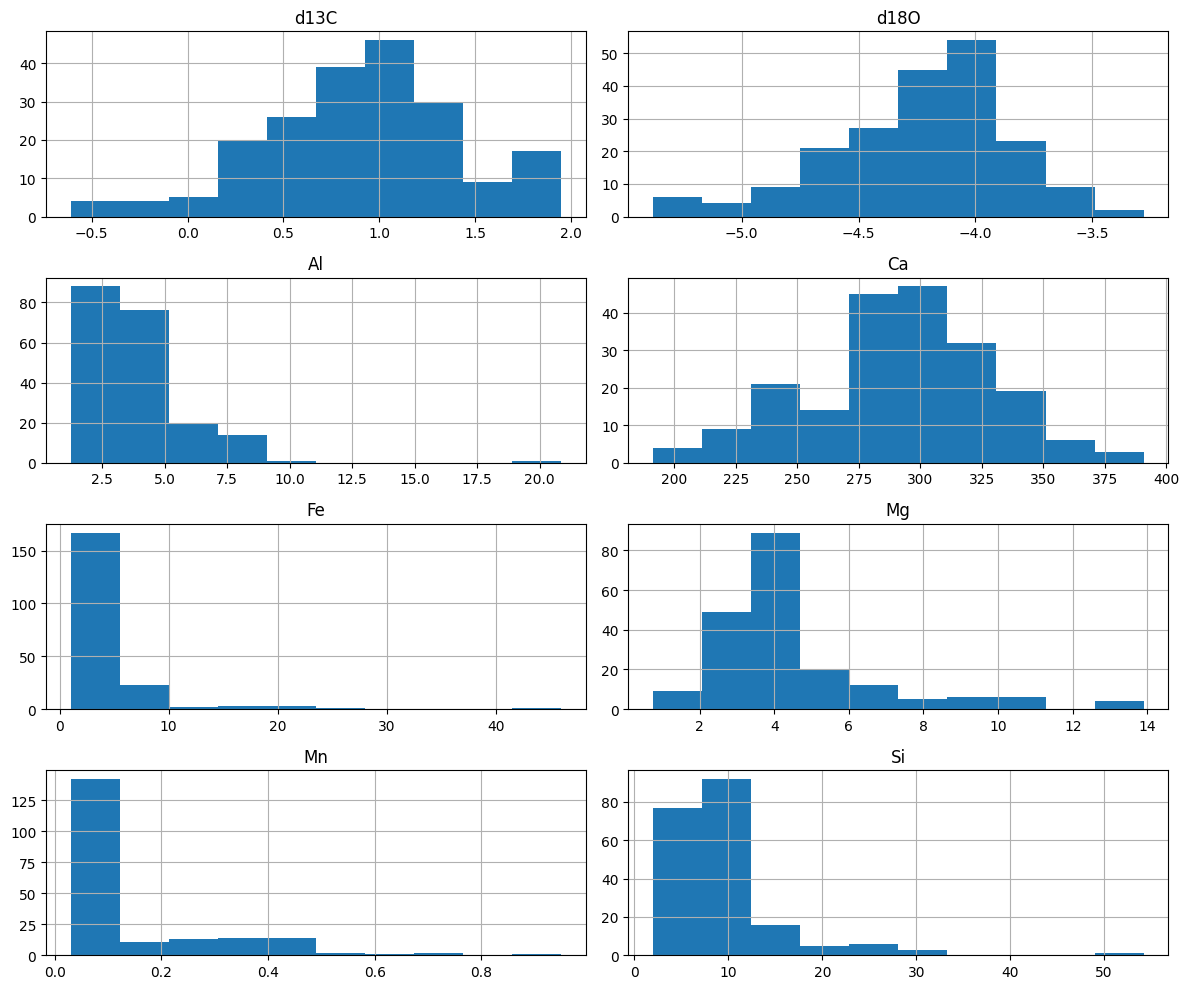

In [2]:
nashville = pd.read_csv("/content/drive/MyDrive/Antu /Python/PCA/NashvilleCarbonates.csv", index_col=0)
geochem = nashville.iloc[:, 1:9].copy()

geochem.hist(figsize=(12, 10), layout=(4, 2))
plt.tight_layout()
plt.show()


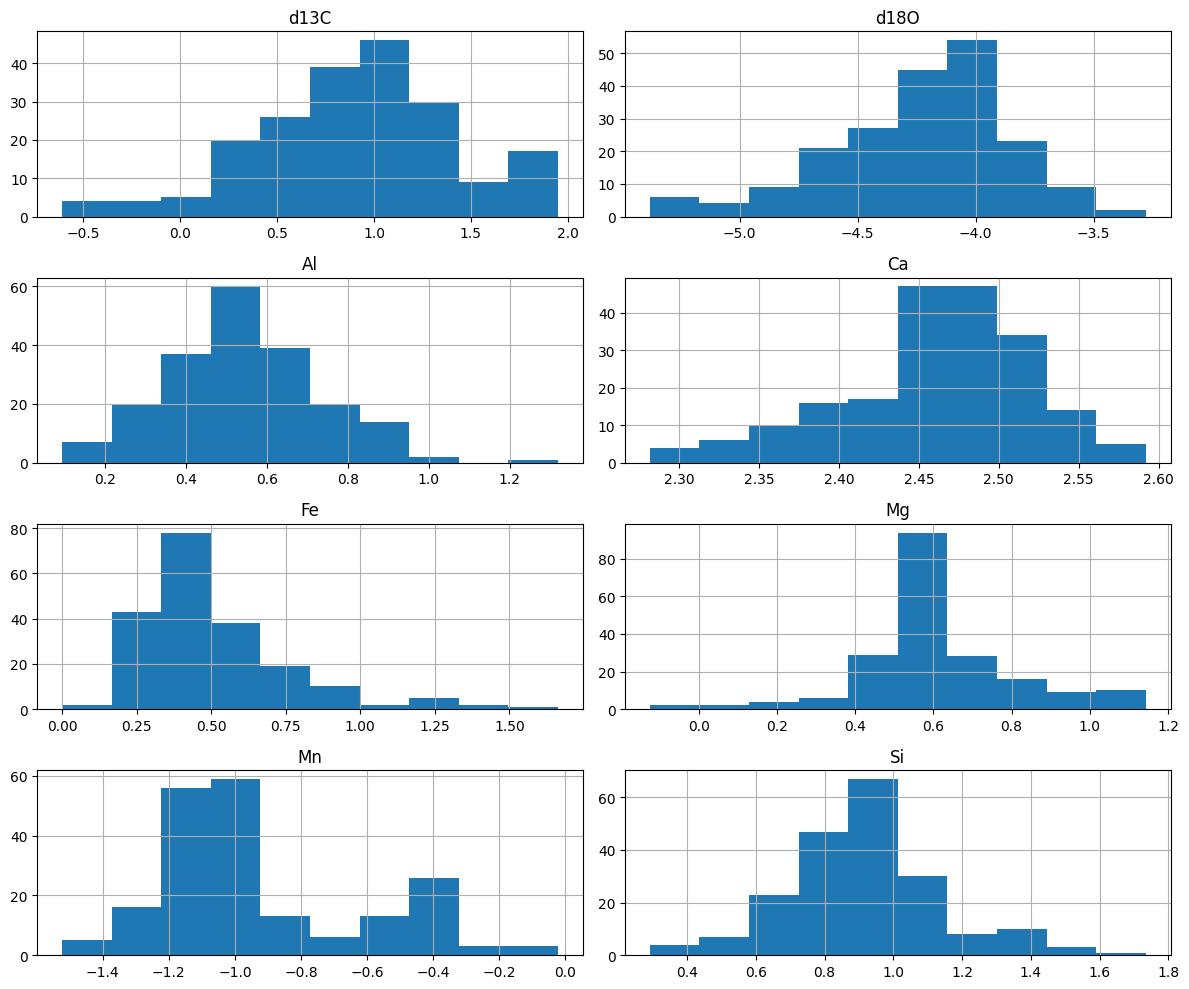

In [3]:
geochem.iloc[:, 2:8] = np.log10(geochem.iloc[:, 2:8])

geochem.hist(figsize=(12, 10), layout=(4, 2))
plt.tight_layout()
plt.show()

In [4]:
print(geochem.describe())
print(geochem.head())

           d13C        d18O          Al          Ca          Fe          Mg  \
count  200.0000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.8975   -4.225100    0.544123    2.460062    0.505796    0.607850   
std      0.5160    0.385498    0.188721    0.059117    0.260961    0.197064   
min     -0.6100   -5.380000    0.093422    2.281760    0.000000   -0.124939   
25%      0.5675   -4.452500    0.425284    2.434465    0.342423    0.520811   
50%      0.9300   -4.160000    0.524396    2.467385    0.430558    0.578066   
75%      1.2200   -3.960000    0.648840    2.500438    0.591897    0.675775   
max      1.9500   -3.280000    1.319522    2.591921    1.663041    1.143015   

               Mn          Si  
count  200.000000  200.000000  
mean    -0.929483    0.911366  
std      0.313727    0.218726  
min     -1.522879    0.292256  
25%     -1.154902    0.776337  
50%     -1.045757    0.902003  
75%     -0.744727    1.020565  
max     -0.022276    1.734079  


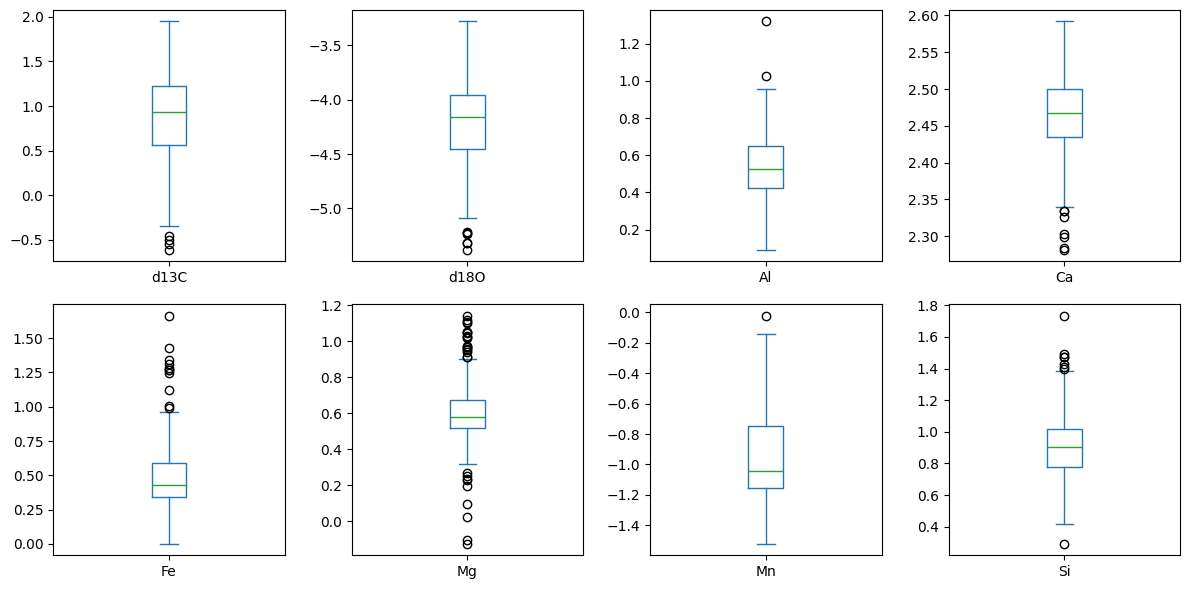

In [5]:
geochem.plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 6),
sharex=False)
plt.tight_layout()
plt.show()


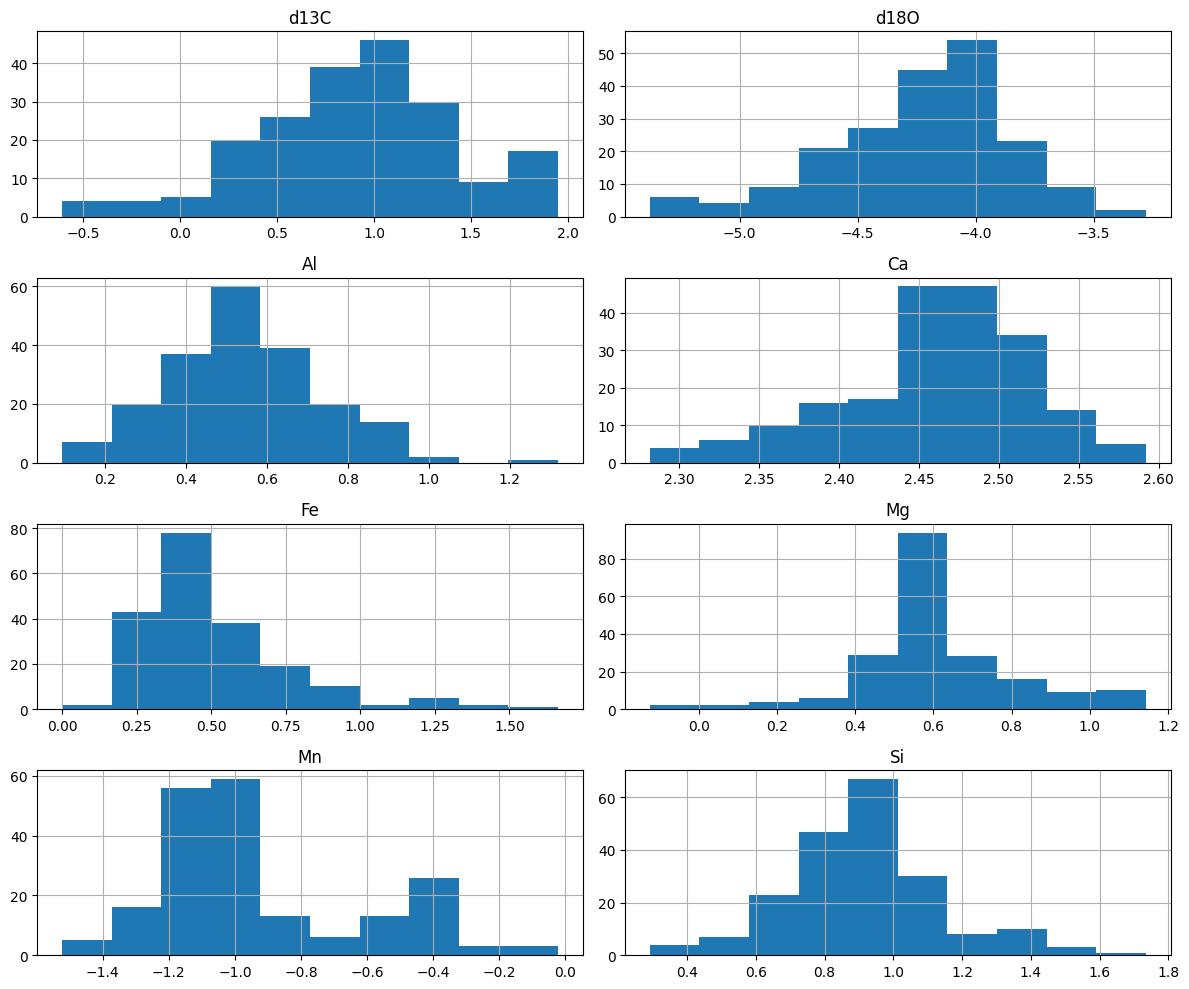

In [6]:
geochem.hist(figsize=(12, 10), layout=(4, 2))
plt.tight_layout()
plt.show()


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(geochem)

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

In [8]:
variance = pca.explained_variance_
var_percent = pca.explained_variance_ratio_ * 100
loadings = pca.components_.T
scores = pca_result

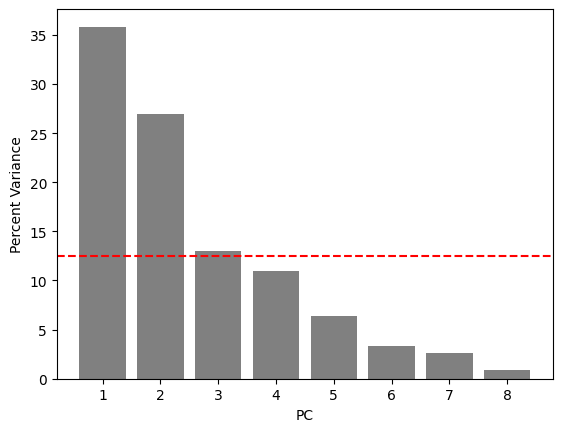

In [9]:
plt.bar(range(1, len(var_percent) + 1), var_percent, color='gray')
plt.xlabel('PC')
plt.ylabel('Percent Variance')
plt.axhline(y=100/geochem.shape[1], color='red', linestyle='--')
plt.xticks(ticks=range(1, len(var_percent) + 1))
plt.show()


In [10]:
loadings_df = pd.DataFrame(np.round(loadings[:, :3], 2),
index=geochem.columns,
columns=['PC1', 'PC2', 'PC3'])

print(loadings_df)


       PC1   PC2   PC3
d13C  0.17 -0.23  0.64
d18O -0.05  0.60  0.06
Al    0.50  0.29  0.03
Ca   -0.33  0.04  0.47
Fe    0.53 -0.09 -0.10
Mg    0.06  0.55  0.44
Mn    0.23 -0.42  0.39
Si    0.51  0.09 -0.06


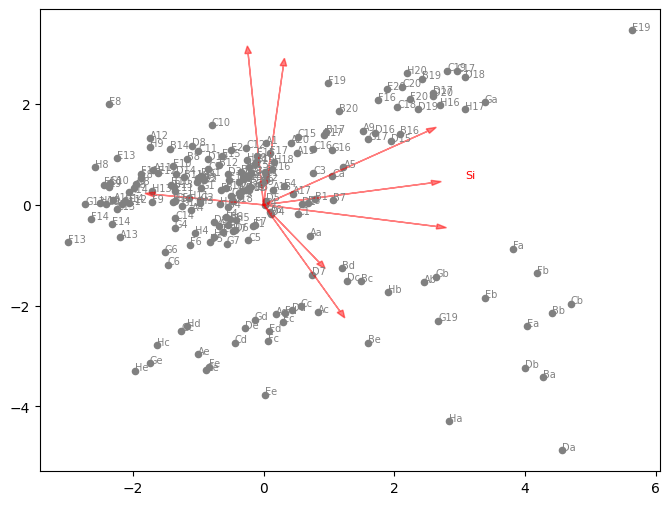

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], c='gray', s=20)

#Plots samples in PC1 vs PC2 space.

for i, txt in enumerate(geochem.index):
    plt.text(scores[i, 0], scores[i, 1], txt, fontsize=7, color='gray')

#Adds sample labels to the plot.
scale = 5
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0]*scale, loadings[i, 1]*scale,
        color='red', alpha=0.5, head_width=0.1)

#Draws arrows showing how original variables contribute to the PCs.
plt.text(loadings[i, 0]*scale*1.2, loadings[i, 1]*scale*1.2,
        geochem.columns[i], color='red', fontsize=8)

plt.show()

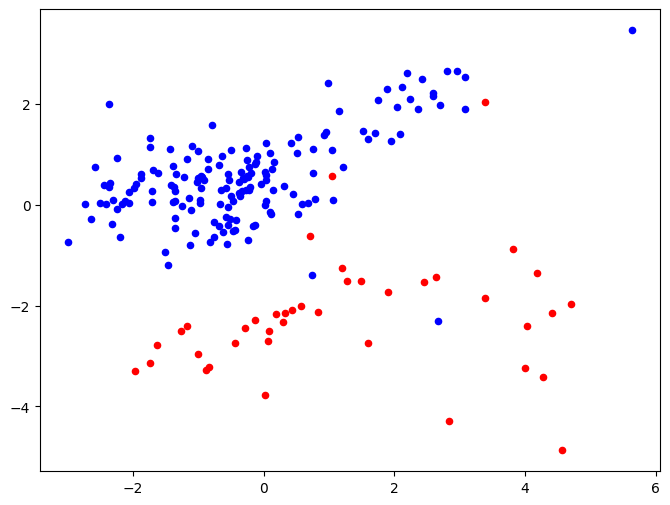

In [12]:
carters = nashville['StratPosition'] < 34.2
hermitage = nashville['StratPosition'] > 34.2

# Creates two boolean arrays for group filtering.

plt.figure(figsize=(8, 6))
plt.scatter(scores[carters, 0], scores[carters, 1], color='blue',
label='Carters', s=20)
plt.scatter(scores[hermitage, 0], scores[hermitage, 1], color='red',
label='Hermitage', s=20)
plt.show()



In [13]:
correlations = np.corrcoef(scores.T[:geochem.shape[1]], scaled_data.T)

# Calculates correlation matrix between each PC and original standardized variables.

cor_df = pd.DataFrame(correlations[:geochem.shape[1], geochem.shape[1]:],
index=[f'PC{i+1}' for i in range(geochem.shape[1])],

columns=geochem.columns)

# Extracts and formats relevant part of the correlation matrix.

print(cor_df)



         d13C      d18O        Al        Ca        Fe        Mg        Mn  \
PC1  0.289417 -0.079774  0.851602 -0.564207  0.897926  0.102838  0.396425   
PC2 -0.335858  0.881990  0.429734  0.060923 -0.126117  0.810018 -0.620062   
PC3  0.652765  0.059359  0.033630  0.483927 -0.099170  0.449966  0.396807   
PC4 -0.534506 -0.240402  0.172279  0.610413 -0.010242  0.003929  0.196807   
PC5 -0.299800  0.169311 -0.116790 -0.189825  0.117434  0.193238  0.479319   
PC6  0.029957  0.287199  0.024878 -0.017216 -0.244939 -0.246420  0.173673   
PC7  0.029299  0.207755 -0.067859  0.186191  0.305154 -0.167735 -0.046293   
PC8  0.001235 -0.010108  0.201068  0.013158 -0.031300 -0.067913  0.011348   

           Si  
PC1  0.871283  
PC2  0.128231  
PC3 -0.062347  
PC4  0.302975  
PC5 -0.255601  
PC6  0.183374  
PC7 -0.077439  
PC8 -0.154232  


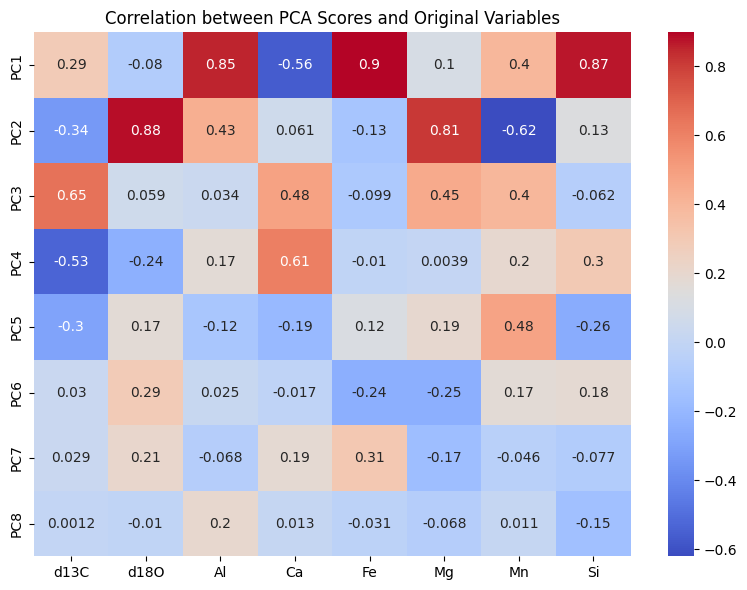

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor_df, annot=True, cmap='coolwarm')
plt.title("Correlation between PCA Scores and Original Variables")
plt.tight_layout()
plt.show()